In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import os
import cv2
import glob
import tensorflow as tf
import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
images_dir = '../../data/best-artworks-of-all-time/images/'
x = []
y = []
for artist in os.listdir(images_dir):
    for filename in glob.glob(images_dir + artist +'/*.jpg'):
        x.append(filename)
        y.append(artist)

In [14]:
np.unique(y)[14]

'Eugene_Delacroix'

In [15]:
np.unique(y, return_counts=True)[1][14]

93

In [16]:
np.unique(y)[37]

'Peter_Paul_Rubens'

In [22]:
np.unique(y, return_counts=True)[1][37]

141

In [18]:
np.unique(y)[12]

'Edvard_Munch'

In [19]:
np.unique(y, return_counts=True)[1][12]

134

In [20]:
np.unique(y)[2]

'Amedeo_Modigliani'

In [21]:
np.unique(y, return_counts=True)[1][2]

193

In [19]:
# for a new value newValue, compute the new count, new mean, the new M2.
# mean accumulates the mean of the entire dataset
# M2 aggregates the squared distance from the mean
# count aggregates the number of samples seen so far
def update(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1 
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2

    return (count, mean, M2)

# retrieve the mean, variance and sample variance from an aggregate
def finalize(existingAggregate):
    (count, mean, M2) = existingAggregate
    (mean, variance, sampleVariance) = (mean, M2/count, M2/(count - 1)) 
    if count < 2:
        return float('nan')
    else:
        return (mean, variance, sampleVariance)

size = (512,512)
 
existingAggregate = (0, np.zeros((512,512,3), dtype=np.float64), np.zeros((512,512,3), dtype=np.float64))
for i in range(len(x)):
    existingAggregate = update(existingAggregate, cv2.resize(cv2.imread(x[i]), size)/255.)
    if (i % 800 == 0):
        print('van 800')
mean, variance, sampleVariance = finalize(existingAggregate)
print(mean)
print(variance)

van 800
van 800
van 800
van 800
van 800
van 800
van 800
van 800
van 800
van 800
van 800
van 800
[[[0.42667095 0.48162731 0.51543547]
  [0.41849841 0.47361755 0.50778081]
  [0.41651899 0.47170966 0.50592733]
  ...
  [0.4218824  0.47798974 0.5146019 ]
  [0.42436855 0.47983166 0.51653077]
  [0.43263833 0.48709609 0.52372324]]

 [[0.41843716 0.47350446 0.50780651]
  [0.40968377 0.46529422 0.49972093]
  [0.40760412 0.46327583 0.49784046]
  ...
  [0.41289941 0.46974438 0.50668294]
  [0.4150189  0.47120292 0.50816933]
  [0.42316017 0.47839882 0.51519988]]

 [[0.41622943 0.4714488  0.50580011]
  [0.40732055 0.46314818 0.49765584]
  [0.40454354 0.46054765 0.49513541]
  ...
  [0.40918816 0.46637153 0.5034613 ]
  [0.41180711 0.46826528 0.50532507]
  [0.42090532 0.47635086 0.5132256 ]]

 ...

 [[0.36314582 0.43047001 0.48302674]
  [0.35352631 0.42183528 0.47518189]
  [0.34849145 0.41747079 0.47170238]
  ...
  [0.35021043 0.42017413 0.47621336]
  [0.35357171 0.42219809 0.47759737]
  [0.36492648 0.4

In [ ]:
rotation_range = 20
width_shift_range = 0.2
height_shift_range = 0.2
horizontal_flip = True
vertical_flip = True
shear_range = 0
zoom_range = 0.5
size = (512,512)
datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    horizontal_flip=horizontal_flip,
    vertical_flip = vertical_flip,
    shear_range=shear_range,
    zoom_range=zoom_range,
    fill_mode='constant',
    cval=0)

step_x = x[0:10]
step_y = y[0:10]
gen = datagen.flow(step_x, step_y, batch_size=1, shuffle=False)
for images, labels in gen:
    plt.imshow((cv2.resize(images[0], size)-mean)/variance)

W0829 23:04:48.960961 140716533442368 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


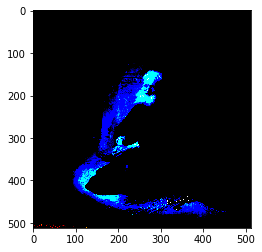

In [72]:
plt.imshow((cv2.resize(cv2.imread(x[1000]), size)/255-mean)/variance)

Eugene_Delacroix


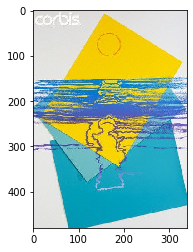

In [15]:
print(y[2])
plt.imshow(cv2.cvtColor(cv2.imread(x[8000]),cv2.COLOR_BGR2RGB))

In [4]:
len(x)

9155

In [7]:
np.unique(y, return_counts=True)

(array(['Albrecht_Dürer', 'Alfred_Sisley', 'Amedeo_Modigliani',
        'Andrei_Rublev', 'Andy_Warhol', 'Camille_Pissarro', 'Caravaggio',
        'Claude_Monet', 'Diego_Rivera', 'Diego_Velazquez', 'Edgar_Degas',
        'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Eugene_Delacroix',
        'Francisco_Goya', 'Frida_Kahlo', 'Georges_Seurat',
        'Giotto_di_Bondone', 'Gustav_Klimt', 'Gustave_Courbet',
        'Henri_Matisse', 'Henri_Rousseau', 'Henri_de_Toulouse-Lautrec',
        'Hieronymus_Bosch', 'Jackson_Pollock', 'Jan_van_Eyck', 'Joan_Miro',
        'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall',
        'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne',
        'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens',
        'Pierre-Auguste_Renoir', 'Piet_Mondrian', 'Pieter_Bruegel',
        'Raphael', 'Rembrandt', 'Rene_Magritte', 'Salvador_Dali',
        'Sandro_Botticelli', 'Titian', 'Vasiliy_Kandinskiy',
        'Vincent_van_Gogh', 'William_Turner'], dty

In [6]:
rotation_range = 10
width_shift_range = 0.1
height_shift_range = 0.1
horizontal_flip = True
vertical_flip = True
shear_range = 0
zoom_range = 0.5
size = (512,512)
datagen = ImageDataGenerator(
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    horizontal_flip=horizontal_flip,
    vertical_flip = vertical_flip,
    shear_range=shear_range,
    zoom_range=zoom_range,
    fill_mode='constant',
    cval=0)

In [8]:
save_dir = '../../data/best-artworks-of-all-time/'
for index in range(len(np.unique(y, return_counts=True)[1])):
    if (np.unique(y, return_counts=True)[1][index] < 80):
        indexes = np.array([src == np.unique(y)[index] for src in y])
        step_x = np.array([cv2.resize(cv2.imread(src), size) for src in np.array(x)[indexes]])
        step_y = np.array(y)[indexes]
        gen = datagen.flow(step_x, step_y, batch_size=1, shuffle=False)
        step = 0
        print('writing')
        for images, labels in gen:
            cv2.imwrite(save_dir + 'images/' + labels[0] + '/' + str(step) + "-extra.jpg", images[0])
            cv2.imwrite(save_dir + 'train/' + labels[0] + '/' + str(step) + "-extra.jpg", images[0])
            step += 1
            if step == len(step_x):
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break
        print('done')

writing
done
writing
done


In [38]:
size = (512,512)
x_small = [cv2.resize(cv2.imread(x[i]), size) for i in range(int(len(x)/2))]

KeyboardInterrupt: 

In [ ]:
x_small = None

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [10]:
save_dir = '../../data/best-artworks-of-all-time/'
for i in range(len(x_train)):
    if not os.path.exists(save_dir + 'train/' + y_train[i]):
        os.makedirs(save_dir + 'train/' + y_train[i])
    cv2.imwrite(save_dir + 'train/' + y_train[i] + "/" + str(i) + ".jpg", cv2.imread(x_train[i]))

for i in range(len(x_test)):
    if not os.path.exists(save_dir + 'test/' + y_test[i]):
        os.makedirs(save_dir + 'test/' + y_test[i])
    cv2.imwrite(save_dir + 'test/' + y_test[i] + "/" + str(i) + ".jpg", cv2.imread(x_test[i]))

In [11]:
x

['../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_2.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_4.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_5.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_24.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_1.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_19.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_28.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_8.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_25.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_17.jpg',
 '../../data/best-artworks-of-all-time/images/Eugene_Delacroix/Eugene_Delacroix_26.jpg',
 '../../data/best-artworks